In [121]:
# importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import zscore
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings( "ignore")

In [94]:
# loading the data

df = pd.read_csv("/content/Twitter A_B testing.csv")

In [95]:
df.head()

,treatment,company_size,campaign_spend,campaign_budget
0,False,small,10.4477,3.9035
1,False,medium,3.7776,1.9872
2,False,medium,46.1880,55.4523
3,False,small,6.6271,6.5136
4,False,small,92.3405,83.1018


In [96]:
# checking the shape

df.shape

(15474, 4)

In [97]:
#viewing the columns

df.columns

Index(['treatment', 'company_size', 'campaign_spend', 'campaign_budget'], dtype='object')

In [98]:
#seeing if there are any duplicates

df.duplicated().sum()

np.int64(0)

In [99]:
# more information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15474 entries, 0 to 15473
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   treatment        15474 non-null  bool   
 1   company_size     15474 non-null  object 
 2   campaign_spend   15474 non-null  float64
 3   campaign_budget  15474 non-null  float64
dtypes: bool(1), float64(2), object(1)
memory usage: 377.9+ KB


In [100]:
# Check unique values in 'company_size'

# df['company_size'].unique()
df['company_size'].value_counts()

,count
company_size,
small,8901
large,5146
medium,1427


In [101]:
# Add calculated fields
df['overspend'] = df['campaign_spend'] - df['campaign_budget']
df['overspend_percent'] = df['overspend'] / df['campaign_budget'] * 100
df['overspent_flag'] = df['overspend_percent'] > 1
df['percent_budget_spent'] = df['campaign_spend'] / df['campaign_budget'] * 100

In [102]:
# separating the numeric and categoric variable

df_num = df.select_dtypes(['float64','int64'])
df_cat = df.select_dtypes(['object'])

In [ ]:
# Univariate analysis

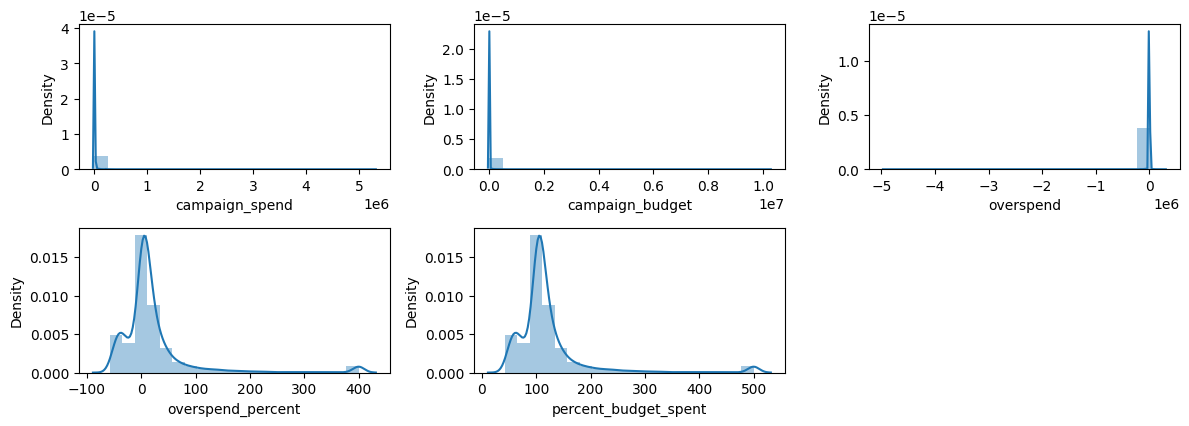

In [103]:
# for numerical values

plt.figure(figsize = (12,8))
feature_list = df_num.columns

for i in range(len(feature_list)):
  plt.subplot(4, 3, i + 1)
  sns.distplot(df_num[feature_list[i]], kde=True, bins =20);
  plt.tight_layout()

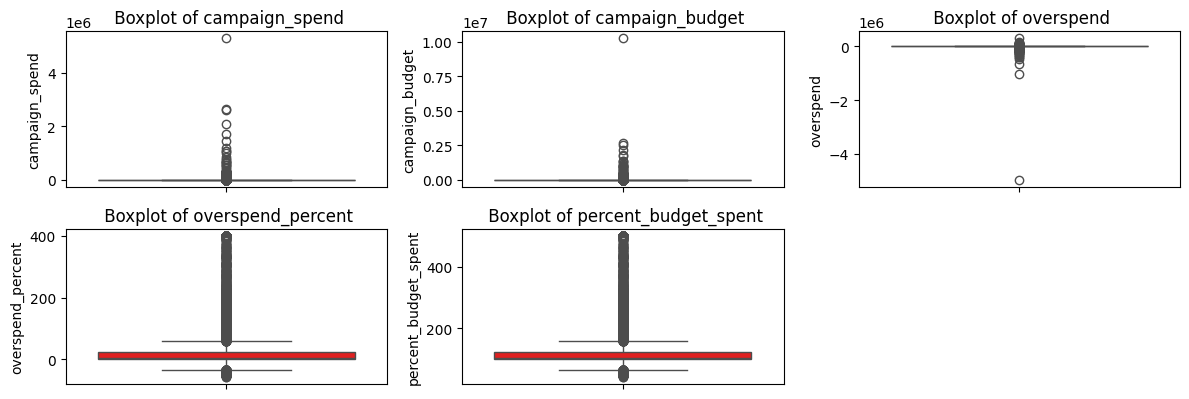

In [84]:
# checking if any outliers are present

plt.figure(figsize = (12,8))
feature_list = df_num.columns

for i in range(len(feature_list)):
  plt.subplot(4, 3, i + 1)
  sns.boxplot(df_num[feature_list[i]],color='r');
  plt.title(' Boxplot of {}'.format(feature_list[i]))
  plt.tight_layout()

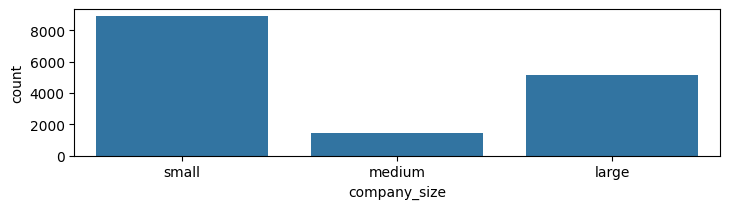

In [85]:
# for categorical values

plt.figure(figsize = (14,12))
feature_list = df_cat.columns
for i in range(len(feature_list)):
    plt.subplot(6, 2, i + 1)
    sns.countplot(x = df_cat[feature_list[i]], data = df_cat)
    plt.tight_layout()

In [ ]:
# Bivariate analysis

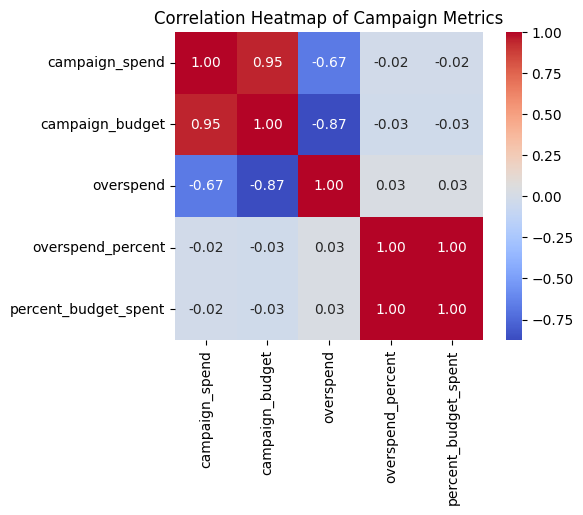

In [91]:
# checking correlation between variables

# Select numerical columns
corr_data = df[['campaign_spend', 'campaign_budget', 'overspend', 'overspend_percent', 'percent_budget_spent']]

# Calculate correlation matrix
corr_matrix = corr_data.corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap of Campaign Metrics')
plt.show()


<Figure size 1000x600 with 0 Axes>

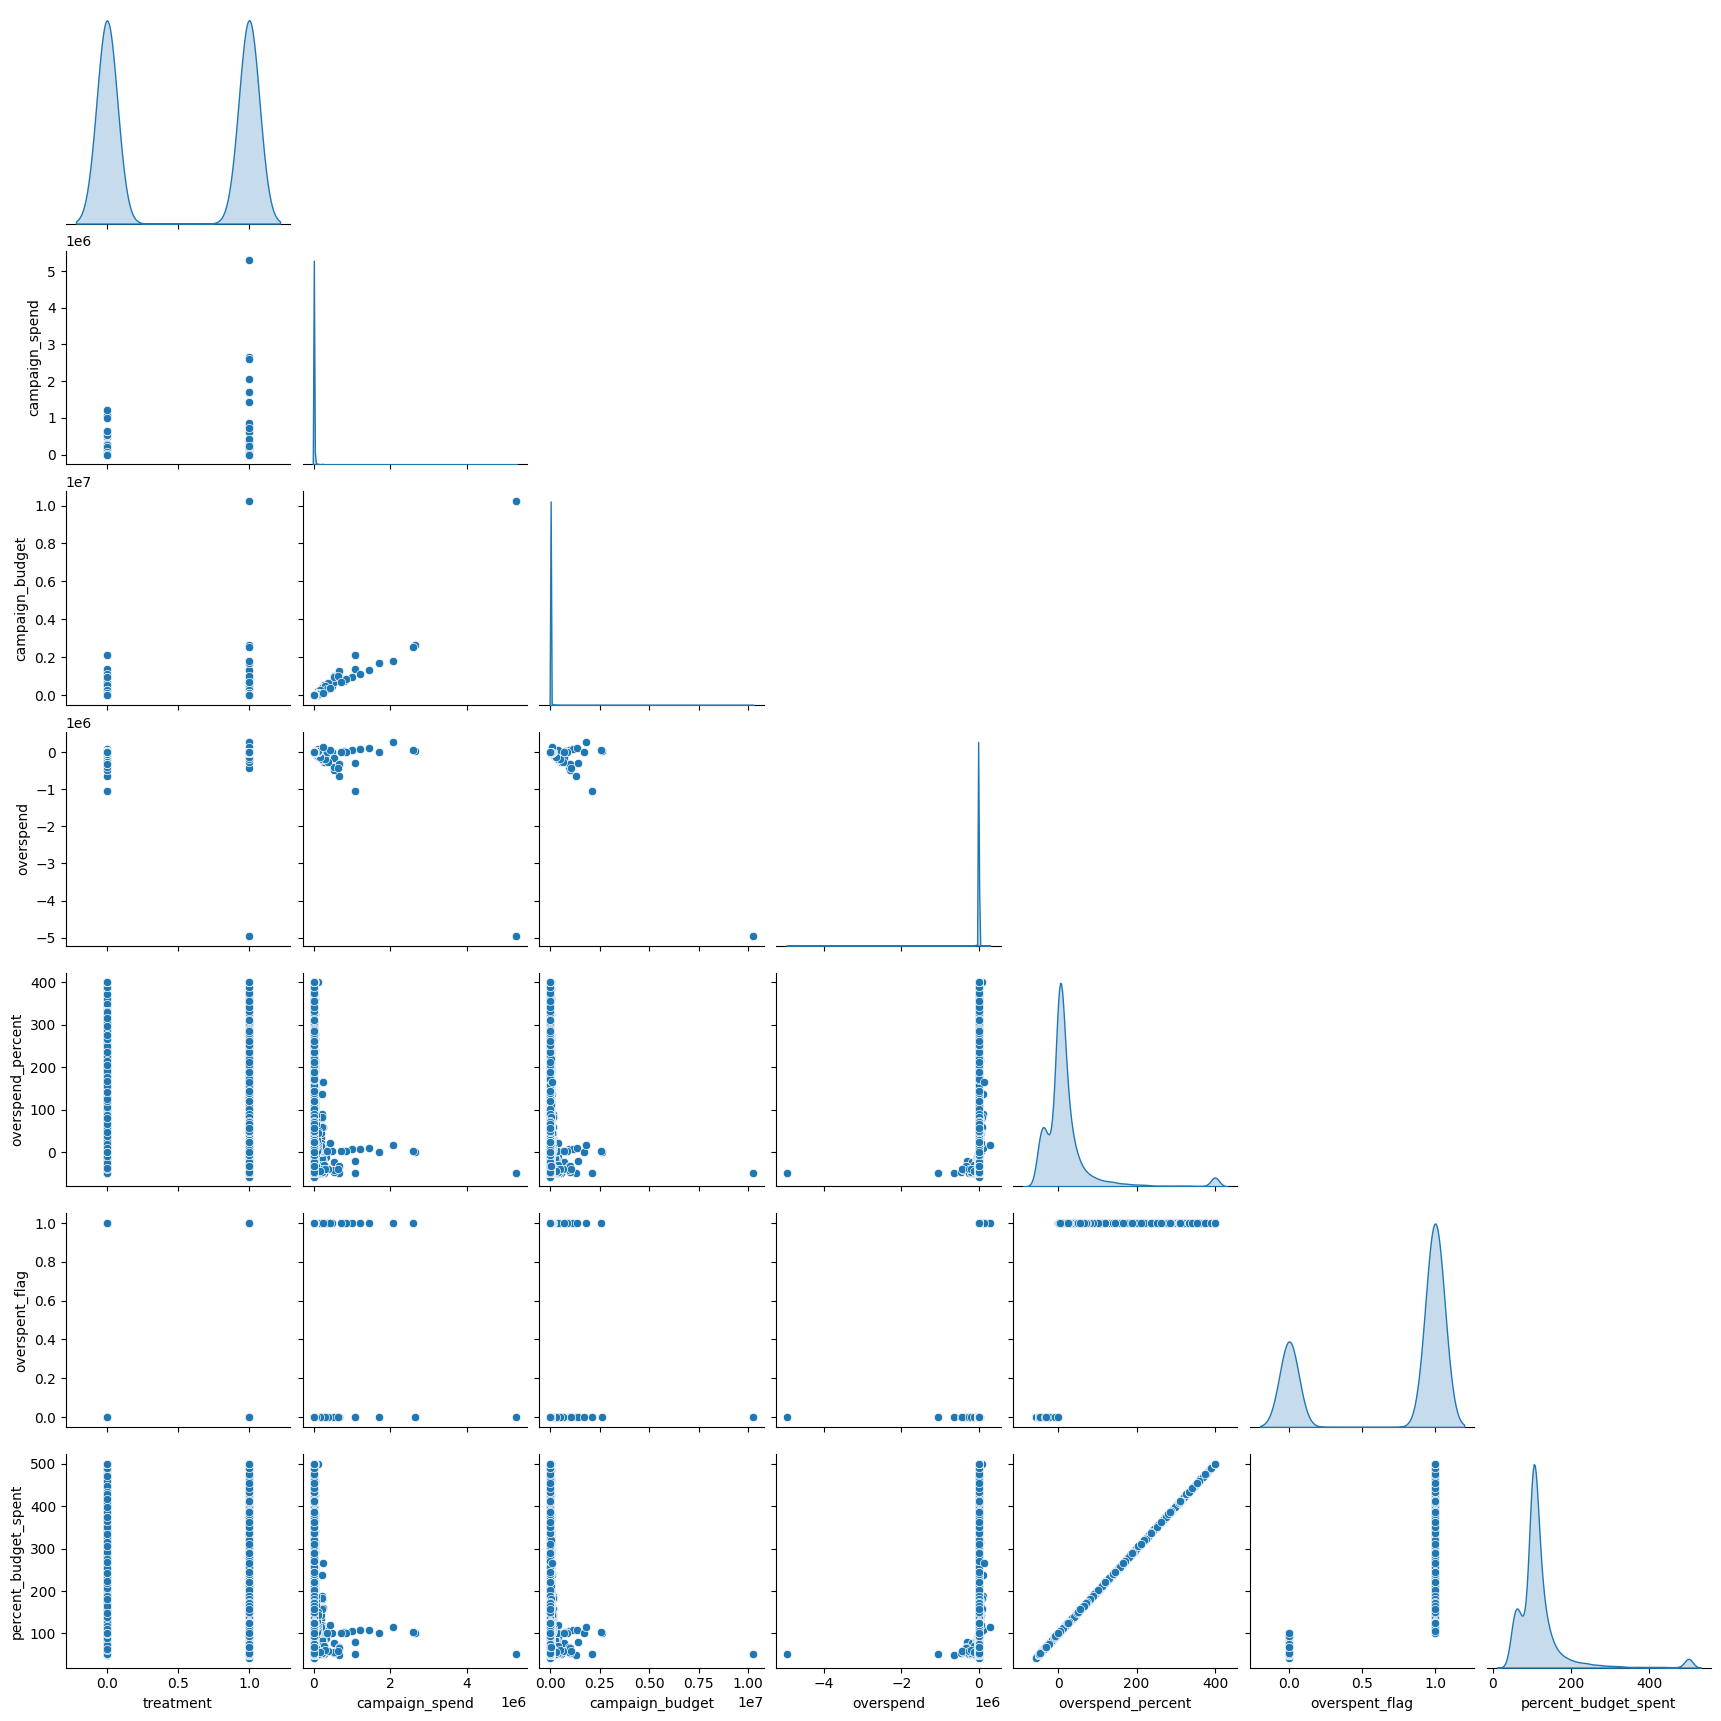

In [92]:
plt.figure(figsize = (10,6))
sns.pairplot(df,diag_kind='kde',corner=True);
plt.show()

In [104]:
# Summarize the data using descriptive statistics and getting more insights about the numerical variables

df.describe()


,campaign_spend,campaign_budget,overspend,overspend_percent,percent_budget_spent
count,1.547400e+04,1.547400e+04,1.547400e+04,15474.000000,15474.000000
mean,4.903037e+03,5.772614e+03,-8.695776e+02,21.462456,121.462456
std,6.516692e+04,9.903381e+04,4.262959e+04,71.981600,71.981600
min,3.595000e-01,9.190000e-02,-4.953671e+06,-57.485809,42.514191
25%,1.517812e+01,1.279290e+01,1.304000e-01,0.308085,100.308085
50%,5.009005e+01,4.881625e+01,2.189600e+00,5.619451,105.619451
75%,2.365468e+02,2.523155e+02,7.817850e+00,24.010133,124.010133
max,5.289217e+06,1.024289e+07,2.885902e+05,400.081466,500.081466


In [105]:
# 1. How many campaigns have overspent of greater than 1% of their budget in the control group?
# In the treatment group?

control_overspent = df[(df['treatment'] == False) & (df['overspent_flag'])].shape[0]
treatment_overspent = df[(df['treatment'] == True) & (df['overspent_flag'])].shape[0]

print(f"Control group overspent campaigns: {control_overspent}")
print(f"Treatment group overspent campaigns: {treatment_overspent}")


Control group overspent campaigns: 5716
Treatment group overspent campaigns: 5180


In [122]:
# 2. Was the new product effective at reducing overspend, and was it more or less effective depending on the company size?
# Put together an analysis describing how the treatment affected overspend.


# Average overspend % by group
avg_overspend = df.groupby('treatment')['overspend_percent'].mean().reset_index()
avg_overspend

,treatment,overspend_percent
0,False,25.32255
1,True,17.60635


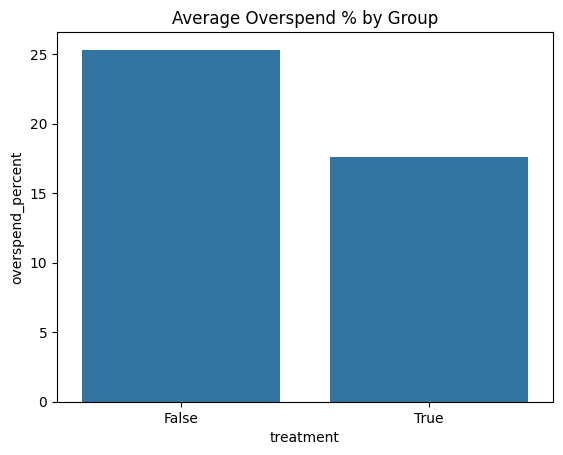

In [123]:
sns.barplot(data=avg_overspend, x='treatment', y='overspend_percent')
plt.title('Average Overspend % by Group')
plt.show()

In [108]:
# By company size
overspend_by_size = df.groupby(['treatment', 'company_size'])['overspend_percent'].mean().reset_index()
overspend_by_size

,treatment,company_size,overspend_percent
0,False,large,12.293655
1,False,medium,4.557030
2,False,small,37.064162
3,True,large,3.263995
4,True,medium,5.144382
5,True,small,27.096085


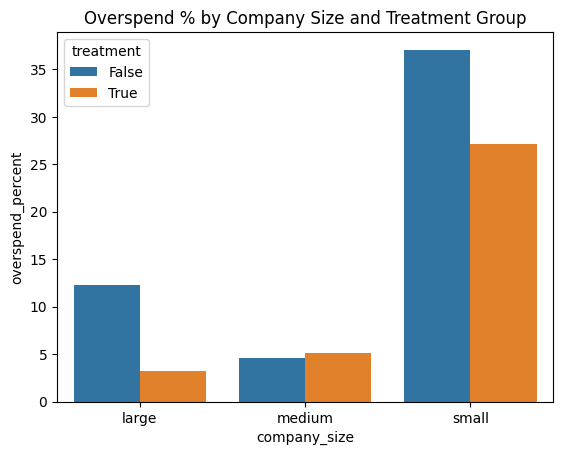

In [109]:
sns.barplot(data=overspend_by_size, x='company_size', y='overspend_percent', hue='treatment')
plt.title('Overspend % by Company Size and Treatment Group')
plt.show()

In [110]:
control_overspend = df[df['treatment'] == False]['overspend_percent']
treatment_overspend = df[df['treatment'] == True]['overspend_percent']

t_stat, p_value = stats.ttest_ind(control_overspend, treatment_overspend, equal_var=False)
print("T-statistic value: ", t_stat)
print("P-Value: ", p_value)

if(p_value < 0.05):
  print("Reject the null hypothesis")
else:
  print("Failed to reject the null hypothesis")


T-statistic value:  6.676538402129285
P-Value:  2.5300672747236123e-11
Reject the null hypothesis


In [111]:
# 3. A product manager on the team is concerned that certain advertisers in the treatment group
# are entering lower budgets because they are wary of the new product.
# Provide some evidence to support their suspicions, or show that any
# differences in budgets are likely due to random fluctuations.

avg_budget = df.groupby('treatment')['campaign_budget'].mean().reset_index()
avg_budget


,treatment,campaign_budget
0,False,4641.827622
1,True,6902.232566


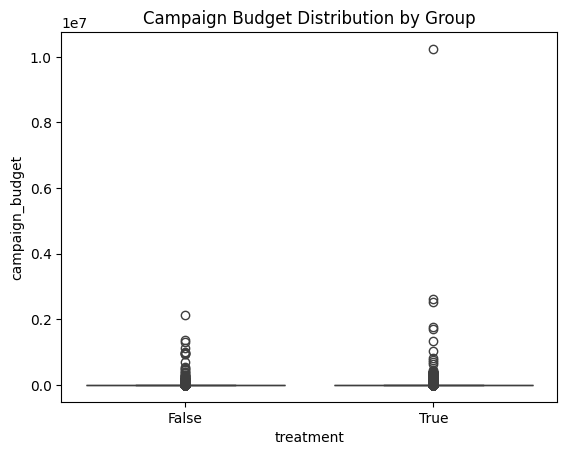

In [112]:
# Visual comparison
sns.boxplot(data=df, x='treatment', y='campaign_budget')
plt.title('Campaign Budget Distribution by Group')
plt.show()

In [113]:
# T-test for budget difference
control_budget = df[df['treatment'] == False]['campaign_budget']
treatment_budget = df[df['treatment'] == True]['campaign_budget']

t_stat, p_value = stats.ttest_ind(control_budget, treatment_budget, equal_var=False)
print("T-statistic value: ", t_stat)
print("P-Value: ", p_value)

if(p_value < 0.05):
  print("Reject the null hypothesis")
else:
  print("Failed to reject the null hypothesis")

T-statistic value:  -1.4202361015910867
P-Value:  0.15557094577701266
Failed to reject the null hypothesis


In [114]:
# 4. What is the average overspend percentage for campaigns in both the control and treatment groups?

avg_overspend = df.groupby('treatment')['overspend_percent'].mean().reset_index()
avg_overspend


,treatment,overspend_percent
0,False,25.32255
1,True,17.60635


In [74]:
# 5. How does the click-through rate (CTR) compare between the traditional click-based model
# and the impression-based model?

# The DataFrame does not include include click or impression data, so click-through rate (CTR)
# cannot be calculated from the provided information. To perform this analysis, additional click
# and impression columns would be required.

# CTR is usually calculated as:

# CTR = Number of Clicks / Number of Impressions

print("CTR data not available in provided dataset.")


CTR data not available in provided dataset.


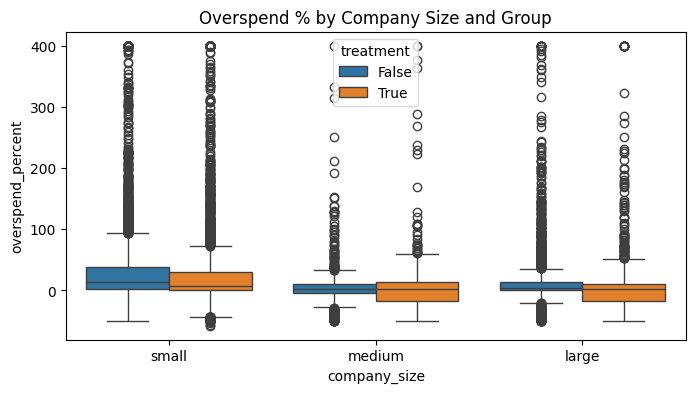

In [125]:
# 6. What demographic factors (e.g., industry, company size) correlate with higher
# overspending rates in both groups?

# Company size overspend pattern
plt.figure(figsize = (8,4))
sns.boxplot(data=df, x='company_size', y='overspend_percent', hue='treatment')
plt.title('Overspend % by Company Size and Group')
plt.show()

In [116]:
# Group by company size
overspend_by_size = df.groupby(['company_size', 'treatment'])['overspend_percent'].mean().reset_index()
overspend_by_size


,company_size,treatment,overspend_percent
0,large,False,12.293655
1,large,True,3.263995
2,medium,False,4.557030
3,medium,True,5.144382
4,small,False,37.064162
5,small,True,27.096085


In [75]:
# 7. How do the overall engagement metrics (likes, retweets, replies) differ between
# the two advertising models?

# Note: Engagement metrics such as likes, retweets, and replies are not included in the provided dataset.
# Further analysis would require these additional features.

print("Engagement metrics (likes, retweets, replies) not available in provided dataset.")


Engagement metrics (likes, retweets, replies) not available in provided dataset.


In [117]:
# 8. Is there a statistically significant difference in the percentage of budget spent between
# the control and treatment groups?

df['percent_budget_spent'] = df['campaign_spend'] / df['campaign_budget'] * 100

control_spent = df[df['treatment'] == False]['percent_budget_spent']
treatment_spent = df[df['treatment'] == True]['percent_budget_spent']

t_stat, p_value = stats.ttest_ind(control_spent, treatment_spent, equal_var=False)
print("T-statistic value: ", t_stat)
print("P-Value: ", p_value)

if(p_value < 0.05):
  print("Reject the null hypothesis")
else:
  print("Failed to reject the null hypothesis")


T-statistic value:  6.676538402129291
P-Value:  2.5300672747235292e-11
Reject the null hypothesis


In [118]:
# 9. Does company size have a significant impact on the overspend percentage in
# both control and treatment groups?

from scipy.stats import f_oneway
company_sizes = df['company_size'].unique()
for size in company_sizes:
    subset = df[df['company_size'] == size]['overspend_percent']
    print(f"Company size: {size}, Sample size: {len(subset)}")

groups = [df[df['company_size'] == size]['overspend_percent'] for size in company_sizes]

f_stat, p_value = f_oneway(*groups)
print(f"One-Way ANOVA: F-statistic={f_stat}, p-value={p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis. Company size has a significant impact on overspend percentage.")
else:
    print("Failed to reject the null hypothesis. Company size does not have a significant impact on overspend percentage.")


Company size: small, Sample size: 8901
Company size: medium, Sample size: 1427
Company size: large, Sample size: 5146
One-Way ANOVA: F-statistic=228.23029205524756, p-value=2.0650160707301405e-98
Reject the null hypothesis. Company size has a significant impact on overspend percentage.


In [126]:
# 10. Is the variance in campaign spend significantly different between the control and treatment groups?

control_var = np.var(control_spent, ddof=1)
treatment_var = np.var(treatment_spent, ddof=1)

f_stat = control_var / treatment_var
print(f"Variance control: {control_var}")
print(f"Variance treatment: {treatment_var}")
print(f"F-statistic: {f_stat}")



Variance control: 5456.991956144386
Variance treatment: 4876.905559329755
F-statistic: 1.118945587475012


In [120]:
# Chi-Square Test: Treatment vs. Overspend Status,
# Test whether overspending (Yes/No) is dependent on treatment group.

# Create contingency table
contingency = pd.crosstab(df['treatment'], df['overspent_flag'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("There is a statistically significant association between treatment and overspending status.")
else:
    print("There is no statistically significant association between treatment and overspending status.")


Chi-Square Statistic: 90.67033815733254
P-value: 1.6971852734360634e-21
There is a statistically significant association between treatment and overspending status.
